In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [5]:
data=pd.read_csv("C:/Users/SD.HEUNAMBIAFENG/Downloads/valeursfoncieres-2020.txt", sep="|", header=0)

C:\Users\SD.HEUNAMBIAFENG\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (14,18,23,24,26,28,31,33,41) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
pd.set_option('display.max_row',111)
pd.set_option('display.max_columns',200)

In [7]:
data.columns.size

43

In [8]:
data

,Code service CH,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Prefixe de section,Section,No plan,No Volume,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,3eme lot,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,07/01/2020,Vente,"8000,00",NaN,NaN,NaN,B063,FORTUNAT,1250.0,CEYZERIAT,1,72,NaN,AK,216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,1061.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,02/01/2020,Vente,"2175,00",NaN,NaN,NaN,B124,TERRES DES CINQ SAULES,1290.0,LAIZ,1,203,NaN,B,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,BT,NaN,85.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,02/01/2020,Vente,"2175,00",NaN,NaN,NaN,B006,BOIS DU CHAMP RION,1290.0,LAIZ,1,203,NaN,B,173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,1115.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,02/01/2020,Vente,"2175,00",NaN,NaN,NaN,B025,EN COROBERT,1290.0,LAIZ,1,203,NaN,B,477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,1940.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,02/01/2020,Vente,"2175,00",NaN,NaN,NaN,B124,TERRES DES CINQ SAULES,1290.0,LAIZ,1,203,NaN,C,68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,1148.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2459555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,16/12/2020,Vente,"1937500,00",24.0,NaN,RUE,1748,CHANOINESSE,75004.0,PARIS 04,75,104,NaN,AW,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2.0,Appartement,NaN,87.0,4.0,S,NaN,447.0
2459556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,16/12/2020,Vente,"1937500,00",24.0,NaN,RUE,1748,CHANOINESSE,75004.0,PARIS 04,75,104,NaN,AW,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3.0,Dépendance,NaN,0.0,0.0,S,NaN,447.0
2459557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,16/12/2020,Vente,"1937500,00",24.0,NaN,RUE,1748,CHANOINESSE,75004.0,PARIS 04,75,104,NaN,AW,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2.0,Appartement,NaN,82.0,2.0,S,NaN,447.0
2459558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,16/12/2020,Vente,"1937500,00",24.0,NaN,RUE,1748,CHANOINESSE,75004.0,PARIS 04,75,104,NaN,AW,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3.0,Dépendance,NaN,0.0,0.0,S,NaN,447.0


In [9]:
df=data.copy()

Exploratory Data Analysis
Analyse de la forme
Target:
Valeur fonciere


Nombre de lignes:
2459560

Nombre de colonnes:
43

Types de variables:
quantitatives: 21 qualitatives: 21

In [10]:
df.shape

(2459560, 43)

In [11]:
df.dtypes.unique()

array([dtype('float64'), dtype('int64'), dtype('O')], dtype=object)

In [12]:
df.select_dtypes('float64').columns.size

17

In [13]:
df.select_dtypes('int64').columns.size

4

In [14]:
df.select_dtypes('O').columns.size

22

<AxesSubplot:>

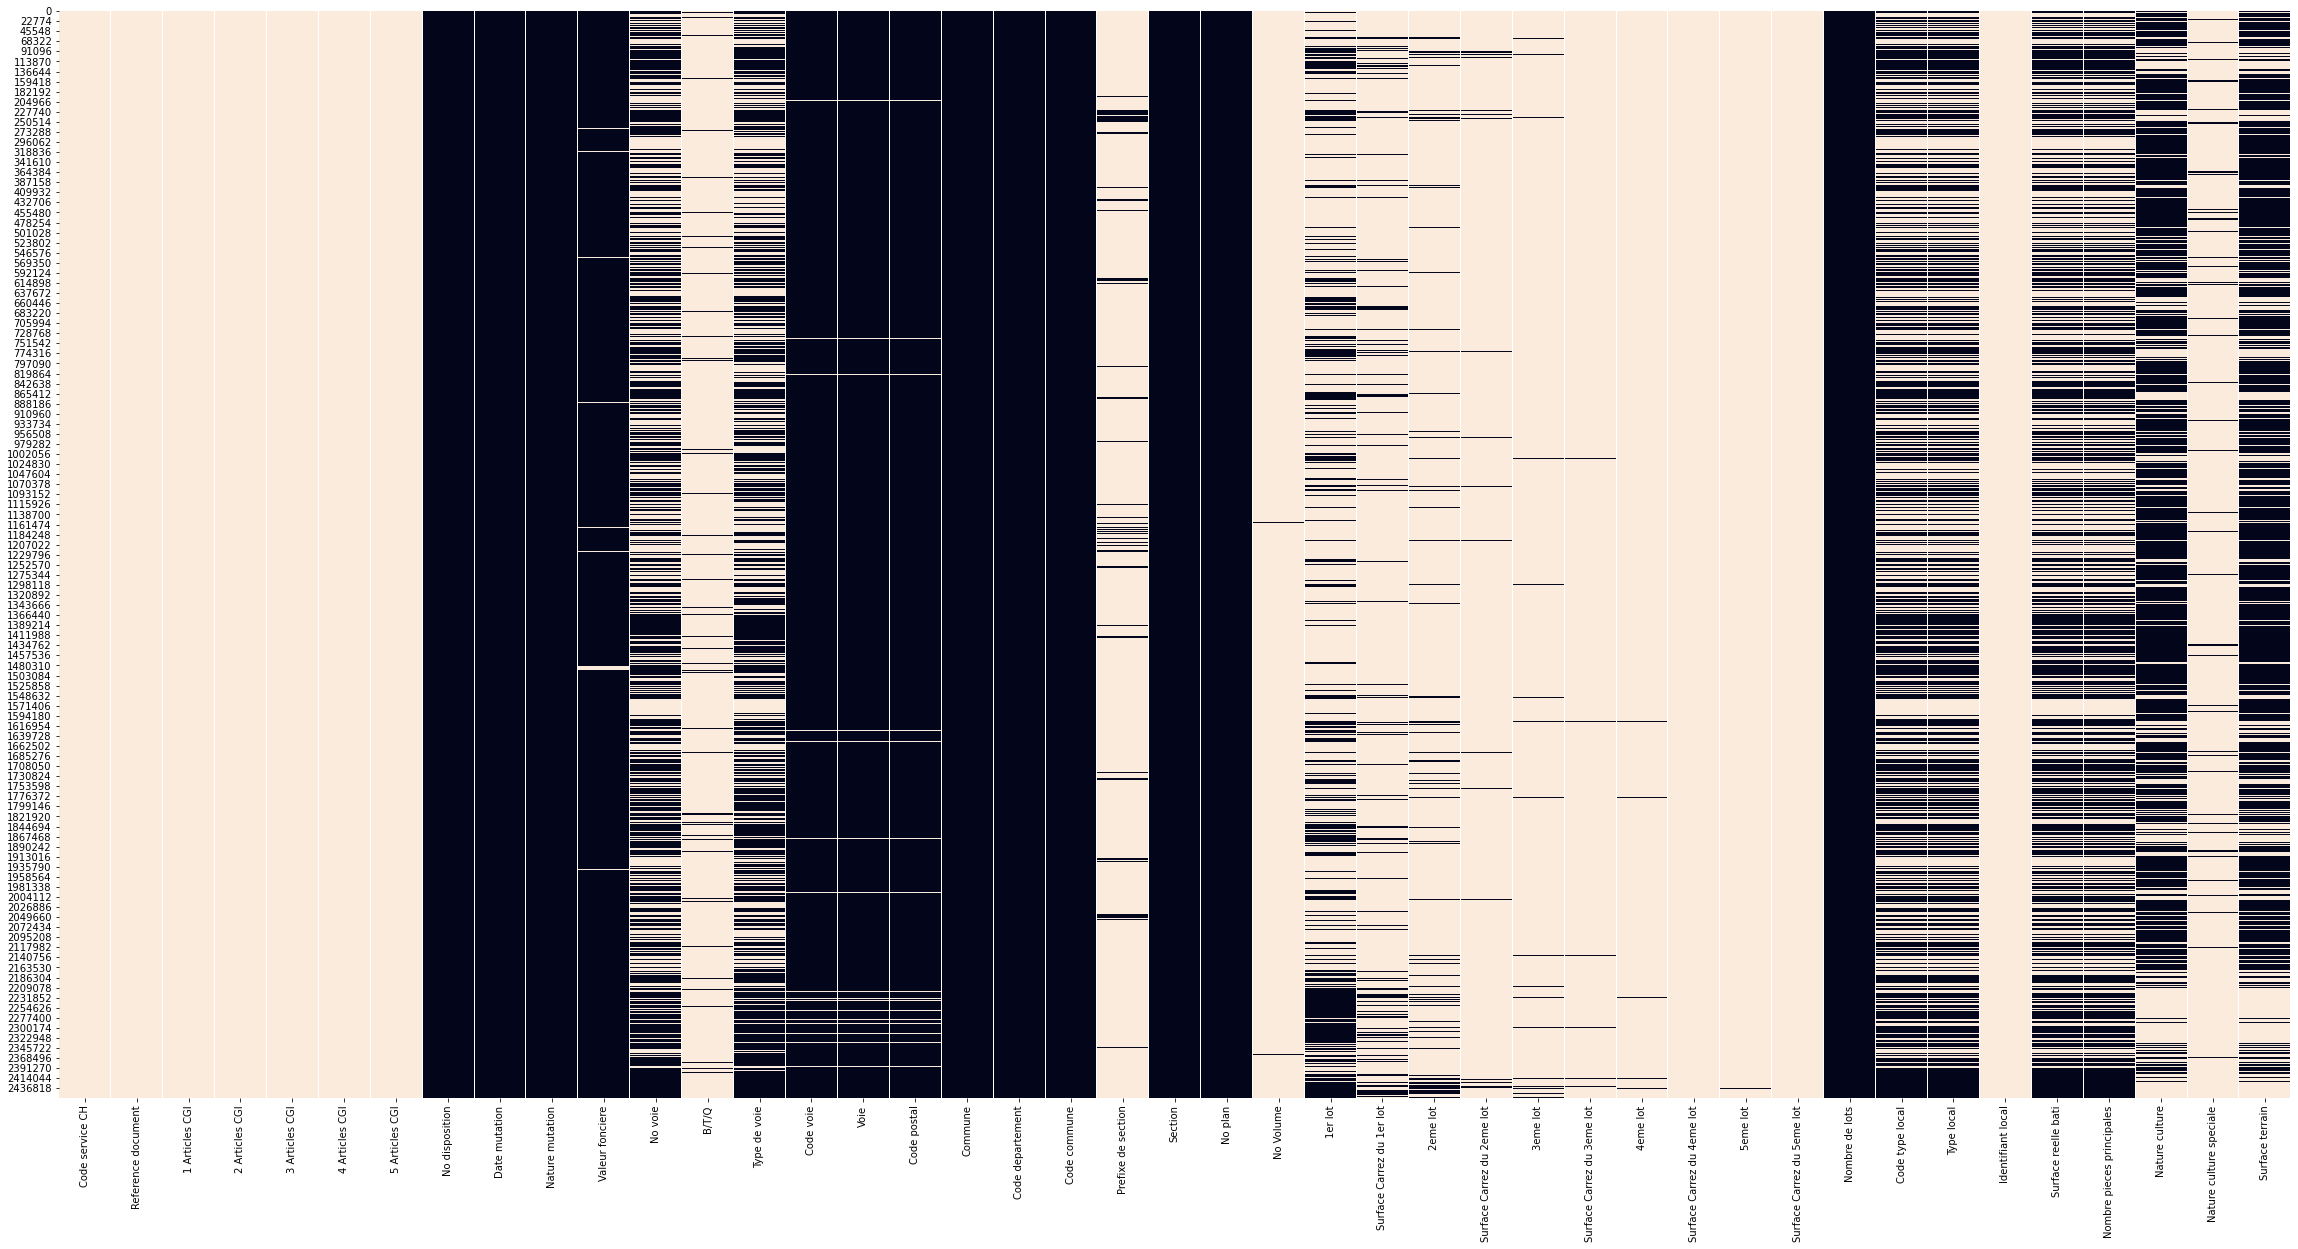

In [15]:
plt.figure(figsize=(40,20))

sns.heatmap(df.isna(), cbar=False)

<AxesSubplot:>

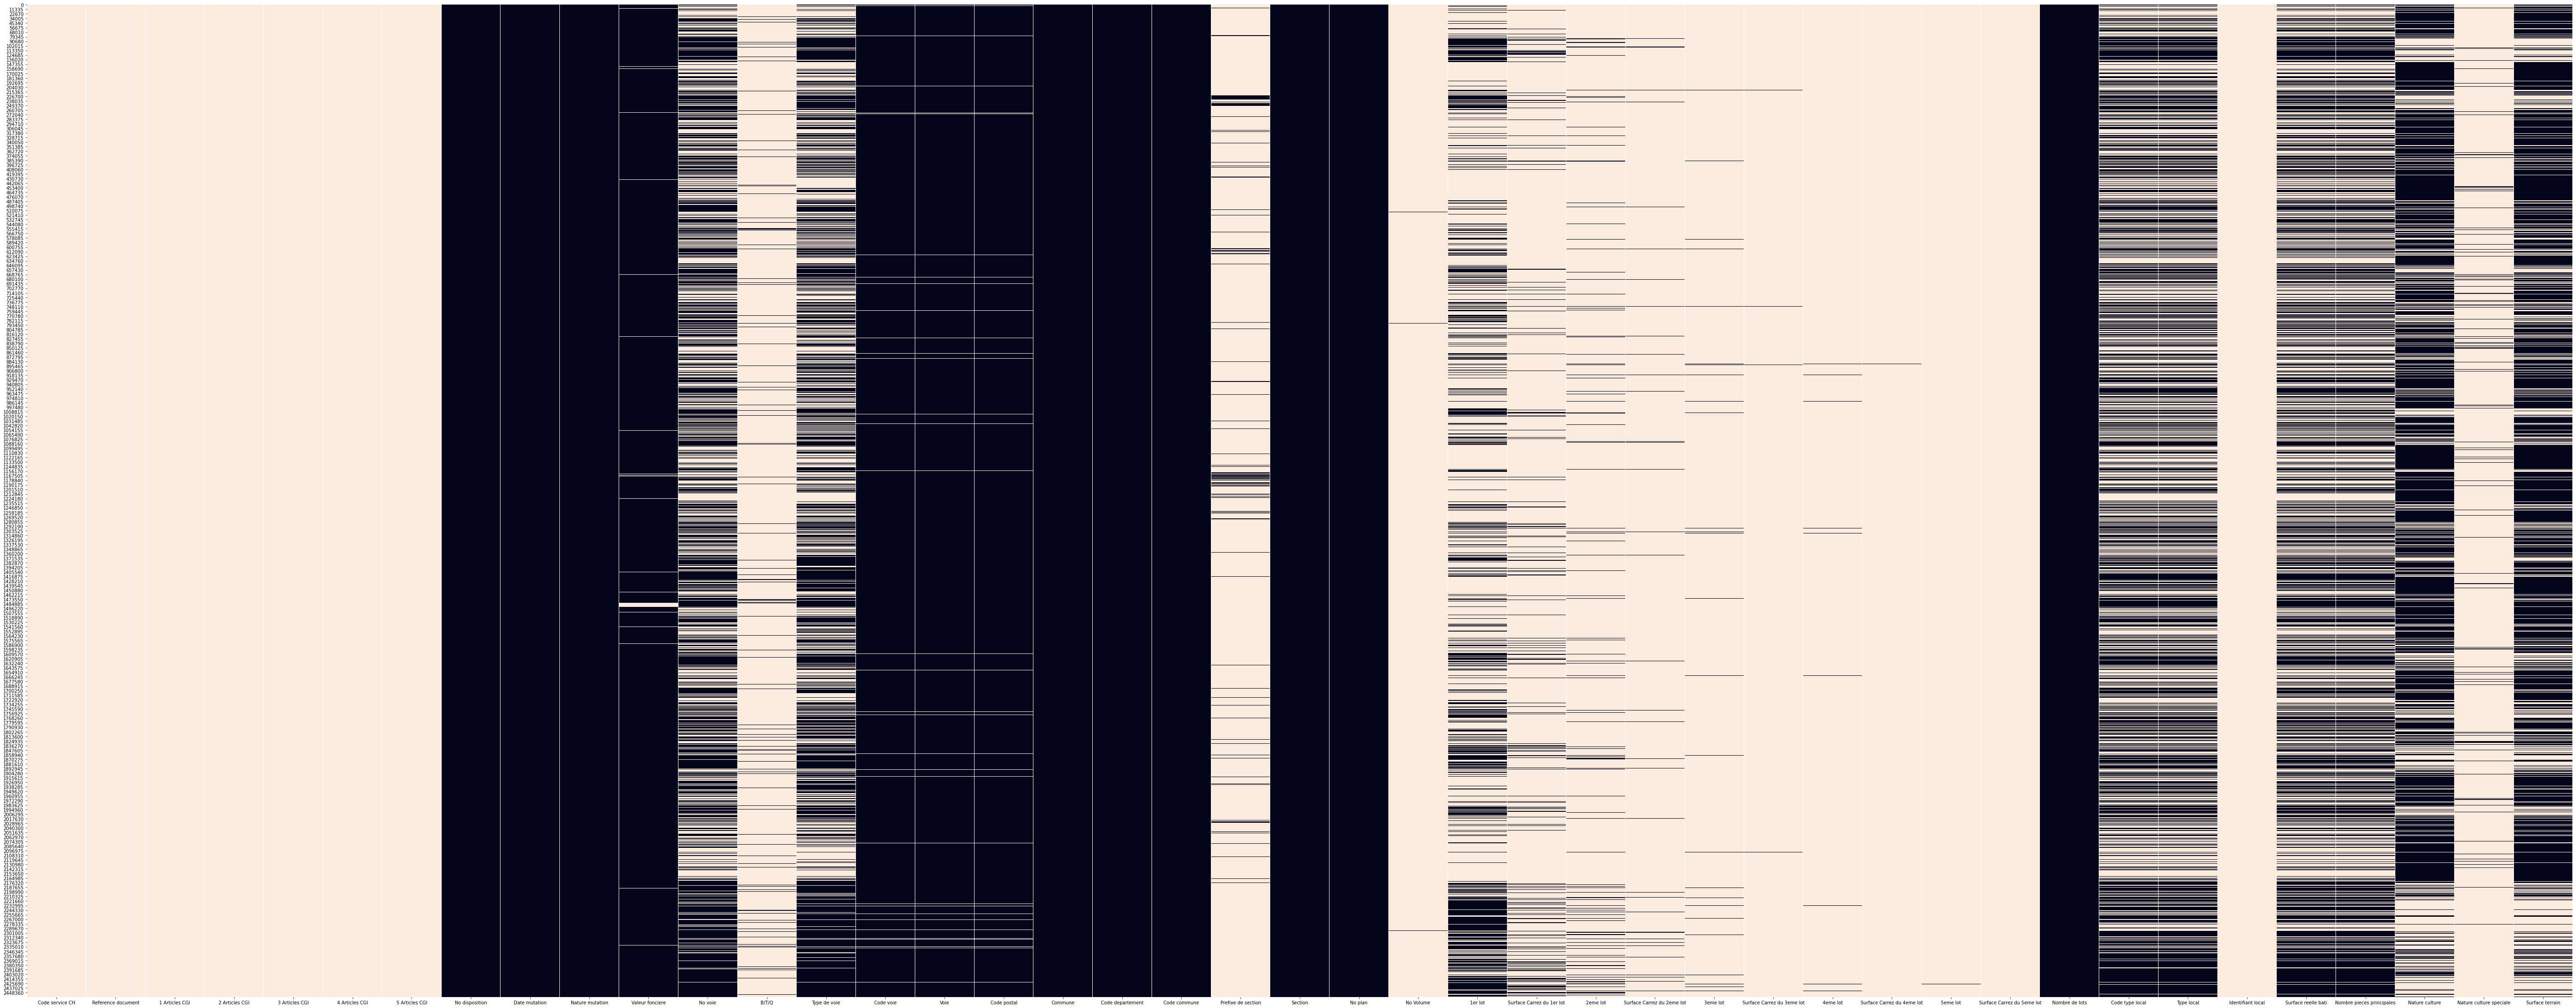

In [16]:
plt.figure(figsize=(100,40))

sns.heatmap(df.isna(), cbar=False)

## Taux de Nan par colonne

In [17]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

Nombre de lots                0.000000
No plan                       0.000000
Code commune                  0.000000
Code departement              0.000000
Commune                       0.000000
No disposition                0.000000
Date mutation                 0.000000
Nature mutation               0.000000
Section                       0.000041
Code voie                     0.012583
Code postal                   0.012601
Voie                          0.012654
Valeur fonciere               0.012910
Nature culture                0.312119
Surface terrain               0.312119
No voie                       0.402651
Type de voie                  0.413873
Type local                    0.465012
Code type local               0.465012
Nombre pieces principales     0.465648
Surface reelle bati           0.465648
1er lot                       0.692226
Surface Carrez du 1er lot     0.914912
2eme lot                      0.936679
Prefixe de section            0.955681
Nature culture speciale  

## Traitement de la cible

In [73]:
df['Valeur fonciere']=df['Valeur fonciere'].map(lambda x: float(str(x).split(sep=",")[0]))

In [19]:
df[df['Valeur fonciere'].isna()]['Nature mutation'].unique()

array(['Vente', 'Echange', 'Expropriation',
       "Vente en l'état futur d'achèvement", 'Vente terrain à bâtir',
       'Adjudication'], dtype=object)

In [20]:
df[(df['Nature mutation']== 'Expropriation') & (df['Valeur fonciere'].isna())].size

19221

### Observation du pourcentage de valeurs foncieres nulles par nature de mutation

In [21]:
df[(df['Nature mutation']== "Vente en l'état futur d'achèvement")]['Valeur fonciere'].isna().describe()

count     181174
unique         2
top        False
freq      181115
Name: Valeur fonciere, dtype: object

In [22]:
df['Nombre de lots'].unique()

array([  0,   2,   1,   3,   6,   5,   4,  15,   9,   7,  13,  11,  42,
         8,  12,  46,  26,  20,  10,  14, 107, 108,  21,  38,  19,  25,
        27,  16,  23,  43,  35,  17, 142,  24,  18,  28,  22,  30,  49,
        62,  40,  31,  50,  44,  34,  53,  51,  54,  37, 119,  93,  66,
        47,  36, 121,  32,  33,  90,  79,  61, 150,  80, 122,  55],
      dtype=int64)

In [23]:
df[(df["Surface terrain"].isna()==False)][["Surface reelle bati","Surface terrain", "Surface Carrez du 1er lot","Surface Carrez du 2eme lot", "Surface Carrez du 3eme lot","Surface Carrez du 4eme lot","Surface Carrez du 5eme lot"]]

,Surface reelle bati,Surface terrain,Surface Carrez du 1er lot,Surface Carrez du 2eme lot,Surface Carrez du 3eme lot,Surface Carrez du 4eme lot,Surface Carrez du 5eme lot
0,NaN,1061.0,NaN,NaN,NaN,NaN,NaN
1,NaN,85.0,NaN,NaN,NaN,NaN,NaN
2,NaN,1115.0,NaN,NaN,NaN,NaN,NaN
3,NaN,1940.0,NaN,NaN,NaN,NaN,NaN
4,NaN,1148.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2459554,27.0,447.0,NaN,NaN,NaN,NaN,NaN
2459555,87.0,447.0,NaN,NaN,NaN,NaN,NaN
2459556,0.0,447.0,NaN,NaN,NaN,NaN,NaN
2459557,82.0,447.0,NaN,NaN,NaN,NaN,NaN


In [24]:
df["Surface terrain"].isna().describe()

count     2459560
unique          2
top         False
freq      1691885
Name: Surface terrain, dtype: object

In [25]:
import shapefile

In [27]:
data_geo_shp=shapefile.Reader("C:/Users/SD.HEUNAMBIAFENG/Downloads/cadastre-75-parcelles-shp/parcelles.shp")

In [30]:
data_geo_prj=shapefile.Reader("C:/Users/SD.HEUNAMBIAFENG/Downloads/cadastre-75-parcelles-shp/parcelles.prj")

In [31]:
data_geo_shp_rec=data_geo_shp.shapeRecords()

In [32]:
data_geo_shp_rec[0].shape.points

[(650234.002498897, 6862851.438287678),
 (650234.2791882373, 6862852.047509729),
 (650233.9401427881, 6862853.573860253),
 (650231.3118064834, 6862865.316904626),
 (650230.9727626524, 6862866.843255492),
 (650230.5709981532, 6862867.046867041),
 (650232.2019779927, 6862870.724689496),
 (650231.6394889163, 6862871.007521732),
 (650287.167182263, 6862977.5050188145),
 (650287.8172176641, 6862977.165840372),
 (650288.5114828765, 6862978.561001522),
 (650289.4880437208, 6862980.365179981),
 (650288.3923298983, 6862980.919462877),
 (650294.9332776567, 6862993.373327287),
 (650388.3574574998, 6862947.325183289),
 (650446.240667786, 6862918.807359269),
 (650567.5829730285, 6862859.0015006885),
 (650567.1201653692, 6862858.071371834),
 (650497.6480209865, 6862717.930246055),
 (650487.3916250899, 6862723.133084894),
 (650234.002498897, 6862851.438287678),
 (650350.1493749963, 6862820.695679087),
 (650351.2563745163, 6862823.165946468),
 (650352.2781912617, 6862822.545589935),
 (650353.367277215

In [33]:
print ('number of shapes imported:',len(data_geo_shp.shapes()))

number of shapes imported: 77720


In [34]:
shape_ex = data_geo_shp.shape(0)

In [35]:
shape_ex

In [36]:
x_lon = np.zeros((len(shape_ex.points),1))
y_lat = np.zeros((len(shape_ex.points),1))
for ip in range(len(shape_ex.points)):
    x_lon[ip] = shape_ex.points[ip][0]
    y_lat[ip] = shape_ex.points[ip][1]

(650230.5709981532, 650567.5829730285)

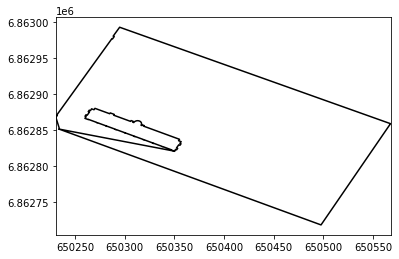

In [37]:
plt.plot(x_lon,y_lat,'k')

# use bbox (bounding box) to set plot limits
plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])

In [38]:
shape_ex.bbox

[650230.5709981532, 6862717.930246055, 650567.5829730285, 6862993.373327287]

In [39]:
fields = data_geo_shp.fields

In [40]:
fields

[('DeletionFlag', 'C', 1, 0),
 ['id', 'C', 14, 0],
 ['commune', 'C', 5, 0],
 ['prefixe', 'C', 3, 0],
 ['section', 'C', 2, 0],
 ['numero', 'C', 4, 0],
 ['contenance', 'N', 12, 0],
 ['created', 'D', 8, 0],
 ['updated', 'D', 8, 0]]

In [42]:
rec = data_geo_shp.record(1000)
rec

Record #1000: ['75120000AA0030', '75120', '000', 'AA', '30', 499, datetime.date(2007, 9, 19), datetime.date(2016, 7, 26)]

In [43]:
data_geo_shp.record(1001)

Record #1001: ['75101000AR0108', '75101', '000', 'AR', '108', 12, datetime.date(2006, 10, 10), datetime.date(2016, 7, 21)]

In [44]:
shape_ex.bbox

[650230.5709981532, 6862717.930246055, 650567.5829730285, 6862993.373327287]

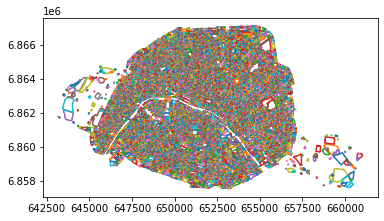

In [46]:
plt.figure()
ax = plt.axes() # add the axes
ax.set_aspect('equal')

for shape in list(data_geo_shp.iterShapes()):
    npoints=len(shape.points) # total points
    nparts = len(shape.parts) # total parts

    if nparts == 1:
        x_lon = np.zeros((len(shape.points),1))
        y_lat = np.zeros((len(shape.points),1))
        for ip in range(len(shape.points)):
            x_lon[ip] = shape.points[ip][0]
            y_lat[ip] = shape.points[ip][1]
        plt.plot(x_lon,y_lat)

    else: # loop over parts of each shape, plot separately
        for ip in range(nparts): # loop over parts, plot separately
            i0=shape.parts[ip]
            if ip < nparts-1:
                i1 = shape.parts[ip+1]-1
            else:
                i1 = npoints

            seg=shape.points[i0:i1+1]
            x_lon = np.zeros((len(seg),1))
            y_lat = np.zeros((len(seg),1))
            for ip in range(len(seg)):
                x_lon[ip] = seg[ip][0]
                y_lat[ip] = seg[ip][1]

            plt.plot(x_lon,y_lat)
plt.show()

In [47]:
shapeRecs = data_geo_shp.shapeRecords()

In [48]:
shapeRecs[0].shape.points

[(650234.002498897, 6862851.438287678),
 (650234.2791882373, 6862852.047509729),
 (650233.9401427881, 6862853.573860253),
 (650231.3118064834, 6862865.316904626),
 (650230.9727626524, 6862866.843255492),
 (650230.5709981532, 6862867.046867041),
 (650232.2019779927, 6862870.724689496),
 (650231.6394889163, 6862871.007521732),
 (650287.167182263, 6862977.5050188145),
 (650287.8172176641, 6862977.165840372),
 (650288.5114828765, 6862978.561001522),
 (650289.4880437208, 6862980.365179981),
 (650288.3923298983, 6862980.919462877),
 (650294.9332776567, 6862993.373327287),
 (650388.3574574998, 6862947.325183289),
 (650446.240667786, 6862918.807359269),
 (650567.5829730285, 6862859.0015006885),
 (650567.1201653692, 6862858.071371834),
 (650497.6480209865, 6862717.930246055),
 (650487.3916250899, 6862723.133084894),
 (650234.002498897, 6862851.438287678),
 (650350.1493749963, 6862820.695679087),
 (650351.2563745163, 6862823.165946468),
 (650352.2781912617, 6862822.545589935),
 (650353.367277215

In [49]:
shapeRecs[0].shape.bbox

[650230.5709981532, 6862717.930246055, 650567.5829730285, 6862993.373327287]

In [50]:
shapeRecs[1].shape.bbox

[650259.9634964054, 6862820.695679087, 650356.8806280041, 6862880.351687222]

In [51]:
shapeRecs[0].record

Record #-1: ['75101000AB0002', '75101', '000', 'AB', '2', 45688, datetime.date(2006, 10, 6), datetime.date(2016, 7, 21)]

In [52]:
shapeRecs[1].record

Record #-1: ['75101000AB0001', '75101', '000', 'AB', '1', 1731, datetime.date(2006, 10, 6), datetime.date(2016, 7, 21)]

In [53]:
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

In [54]:
shapefile_df = read_shapefile(data_geo_shp)

In [55]:
shapefile_df

,id,commune,prefixe,section,numero,contenance,created,updated,coords
0,75101000AB0002,75101,000,AB,2,45688.0,2006-10-06,2016-07-21,"[(650234.002498897, 6862851.438287678), (65023..."
1,75101000AB0001,75101,000,AB,1,1731.0,2006-10-06,2016-07-21,"[(650350.1493749963, 6862820.695679087), (6503..."
2,75101000AC0002,75101,000,AC,2,49342.0,2006-10-06,2016-07-21,"[(650388.3574574998, 6862947.325183289), (6502..."
3,75101000AC0001,75101,000,AC,1,993.0,2006-10-06,2016-07-21,"[(650448.4376878919, 6863052.995753481), (6504..."
4,75101000AD0001,75101,000,AD,1,64760.0,2006-10-06,2016-07-21,"[(650915.7592440435, 6862686.995086259), (6508..."
...,...,...,...,...,...,...,...,...,...
77715,75120000ED0001,75120,000,ED,1,459.0,2007-09-28,2016-07-26,"[(656897.9509424589, 6861156.848863987), (6569..."
77716,75120000ED0026,75120,000,ED,26,160.0,2012-12-17,2016-07-26,"[(656946.2766541241, 6861107.562781846), (6569..."
77717,75120000ED0019,75120,000,ED,19,34.0,2012-08-03,2016-07-26,"[(657119.6895101306, 6861083.659383055), (6571..."
77718,75120000ED0018,75120,000,ED,18,75.0,2012-08-03,2016-07-26,"[(657138.7334787633, 6861087.621664294), (6571..."


In [56]:
df

,Code service CH,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Prefixe de section,Section,No plan,No Volume,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,3eme lot,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,07/01/2020,Vente,"8000,00",NaN,NaN,NaN,B063,FORTUNAT,1250.0,CEYZERIAT,1,72,NaN,AK,216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,1061.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,02/01/2020,Vente,"2175,00",NaN,NaN,NaN,B124,TERRES DES CINQ SAULES,1290.0,LAIZ,1,203,NaN,B,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,BT,NaN,85.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,02/01/2020,Vente,"2175,00",NaN,NaN,NaN,B006,BOIS DU CHAMP RION,1290.0,LAIZ,1,203,NaN,B,173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,1115.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,02/01/2020,Vente,"2175,00",NaN,NaN,NaN,B025,EN COROBERT,1290.0,LAIZ,1,203,NaN,B,477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,1940.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,02/01/2020,Vente,"2175,00",NaN,NaN,NaN,B124,TERRES DES CINQ SAULES,1290.0,LAIZ,1,203,NaN,C,68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,1148.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2459555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,16/12/2020,Vente,"1937500,00",24.0,NaN,RUE,1748,CHANOINESSE,75004.0,PARIS 04,75,104,NaN,AW,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2.0,Appartement,NaN,87.0,4.0,S,NaN,447.0
2459556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,16/12/2020,Vente,"1937500,00",24.0,NaN,RUE,1748,CHANOINESSE,75004.0,PARIS 04,75,104,NaN,AW,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3.0,Dépendance,NaN,0.0,0.0,S,NaN,447.0
2459557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,16/12/2020,Vente,"1937500,00",24.0,NaN,RUE,1748,CHANOINESSE,75004.0,PARIS 04,75,104,NaN,AW,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2.0,Appartement,NaN,82.0,2.0,S,NaN,447.0
2459558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,16/12/2020,Vente,"1937500,00",24.0,NaN,RUE,1748,CHANOINESSE,75004.0,PARIS 04,75,104,NaN,AW,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3.0,Dépendance,NaN,0.0,0.0,S,NaN,447.0


In [61]:
Join=[]
for col in df.columns:
    if (col in shapefile_df.columns):
        Join.append(col)

In [62]:
Join

[]

In [63]:
df.iloc[0,:]

Code service CH                      NaN
Reference document                   NaN
1 Articles CGI                       NaN
2 Articles CGI                       NaN
3 Articles CGI                       NaN
4 Articles CGI                       NaN
5 Articles CGI                       NaN
No disposition                         1
Date mutation                 07/01/2020
Nature mutation                    Vente
Valeur fonciere                  8000,00
No voie                              NaN
B/T/Q                                NaN
Type de voie                         NaN
Code voie                           B063
Voie                            FORTUNAT
Code postal                       1250.0
Commune                        CEYZERIAT
Code departement                       1
Code commune                          72
Prefixe de section                   NaN
Section                               AK
No plan                              216
No Volume                            NaN
1er lot         

In [69]:
df["No plan"].unique().sorted()

<bound method Series.unique of 0          216
1            4
2          173
3          477
4           68
          ... 
2459555     19
2459556     19
2459557     19
2459558     19
2459559    143
Name: No plan, Length: 2459560, dtype: int64>

## Traitement de la clé de jointure

In [ ]:
"Code postal","prefixe" "section" "numero"

In [83]:
pd.set_option('display.max_row',111)
pd.set_option('display.max_columns',200)

In [84]:
df["Code postal"]

0           1250.0
1           1290.0
2           1290.0
3           1290.0
4           1290.0
            ...   
2459555    75004.0
2459556    75004.0
2459557    75004.0
2459558    75004.0
2459559    75002.0
Name: Code postal, Length: 2459560, dtype: float64

## Traitement codepostal

In [92]:
df['Code postal']=df['Code postal'].map(lambda x: str(x).split(sep=".")[0])

In [94]:
df["Prefixe de section"].isna().describe()

count     2459560
unique          2
top          True
freq      2350554
Name: Prefixe de section, dtype: object

In [96]:
df[["Code postal","Section","No plan"]].isna().describe()

,Code postal,Section,No plan
count,2459560,2459560,2459560
unique,1,2,1
top,False,False,False
freq,2459560,2459459,2459560


In [ ]:
df["Code postal"] df["Prefixe de section"] df["Section"] df["No plan"]

In [186]:
df_no_Na=df.copy()

In [189]:
df_to_join=df_no_Na[(df_no_Na["Code postal"].isna()==False) & ( df_no_Na["Code postal"].map(float)>75000 ) & (df_no_Na["Section"].isna()==False) & (df_no_Na["No plan"].isna()==False)]

In [190]:
df["Prefixe de section"]=df["Prefixe de section"].map(lambda x:"000")

In [191]:
df_to_join["jointure"]=df_to_join["Code postal"].map(str)+ df["Prefixe de section"]+ df_to_join["Section"].map(str)+df_to_join["No plan"].map(str)

<ipython-input-191-851adf3dadc8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_join["jointure"]=df_to_join["Code postal"].map(str)+ df["Prefixe de section"]+ df_to_join["Section"].map(str)+df_to_join["No plan"].map(str)


In [194]:
df_to_join["jointure"]

1760829    76410000BA119
1760830    76000000LA111
1760831     76320000AR60
1760832    76320000AR575
1760833    76320000AR575
               ...      
2459555     75004000AW19
2459556     75004000AW19
2459557     75004000AW19
2459558     75004000AW19
2459559    75002000AM143
Name: jointure, Length: 684645, dtype: object

In [195]:
df_to_join.shape

(684645, 44)

In [196]:
shapefile_df["jointure"]=shapefile_df["commune"].map(str)+"000"+shapefile_df["section"].map(str)+shapefile_df["numero"].map(str)

In [197]:
df_to_join=df_to_join.set_index("jointure")

In [198]:
shapefile_df_to_join=shapefile_df.set_index("jointure")

In [199]:
shapefile_df_to_join.index

Index(['75101000AB2', '75101000AB1', '75101000AC2', '75101000AC1',
       '75101000AD1', '75104000AB64', '75104000AB86', '75104000AB85',
       '75104000AB88', '75104000AB60',
       ...
       '75120000ED15', '75120000ED22', '75120000ED24', '75120000ED25',
       '75120000ED21', '75120000ED1', '75120000ED26', '75120000ED19',
       '75120000ED18', '75120000ED27'],
      dtype='object', name='jointure', length=77720)

In [200]:
data_merged= pd.concat([df_to_join,shapefile_df_to_join],axis=1, join='inner', keys=["jointure"])

In [201]:
data_merged= df_to_join.join(shapefile_df_to_join, how="inner")

In [202]:
data_merged

,Code service CH,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Prefixe de section,Section,No plan,No Volume,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,3eme lot,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain,id,commune,prefixe,section,numero,contenance,created,updated,coords
jointure,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [203]:
data_merged.columns.size

52

In [204]:
Commun=[]
for index in df_to_join.index:
    if index in shapefile_df_to_join.index:
        Commun.append(index)

In [205]:
Commun

[]

In [210]:
df_to_join.index.map()

Index(['76410000BA119', '76000000LA111', '76320000AR60', '76320000AR575',
       '76320000AR575', '76300000AB265', '76300000AB265', '76300000AB265',
       '76240000AV23', '76240000AA36',
       ...
       '75004000AW19', '75004000AW19', '75004000AW19', '75004000AW19',
       '75004000AW19', '75004000AW19', '75004000AW19', '75004000AW19',
       '75004000AW19', '75002000AM143'],
      dtype='object', name='jointure', length=684645)

In [207]:
shapefile_df_to_join.index

Index(['75101000AB2', '75101000AB1', '75101000AC2', '75101000AC1',
       '75101000AD1', '75104000AB64', '75104000AB86', '75104000AB85',
       '75104000AB88', '75104000AB60',
       ...
       '75120000ED15', '75120000ED22', '75120000ED24', '75120000ED25',
       '75120000ED21', '75120000ED1', '75120000ED26', '75120000ED19',
       '75120000ED18', '75120000ED27'],
      dtype='object', name='jointure', length=77720)